In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Lo primero, leemos el dataframe
df = pd.read_csv('df_all_rs.csv')
df

,Unnamed: 0,index,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,0,0,2004-04-14,20301188,1610612746,1610612760,2003,1610612746,87.0,0.423,...,17.0,37.0,1610612760,118.0,0.542,1.000,0.375,32.0,34.0,0
1,1,1,2004-04-14,20301184,1610612759,1610612743,2003,1610612759,93.0,0.424,...,15.0,58.0,1610612743,67.0,0.325,0.611,0.222,11.0,47.0,1
2,2,2,2004-04-14,20301181,1610612754,1610612741,2003,1610612754,101.0,0.420,...,24.0,58.0,1610612741,96.0,0.420,0.667,0.357,20.0,41.0,1
3,3,3,2004-04-14,20301177,1610612764,1610612740,2003,1610612764,78.0,0.375,...,13.0,39.0,1610612740,94.0,0.451,0.600,0.364,24.0,48.0,0
4,4,4,2004-04-14,20301179,1610612752,1610612739,2003,1610612752,90.0,0.481,...,13.0,42.0,1610612739,100.0,0.488,0.900,0.364,22.0,40.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19393,19393,19393,2018-10-17,21800011,1610612758,1610612762,2018,1610612758,117.0,0.516,...,17.0,37.0,1610612762,123.0,0.519,0.737,0.481,21.0,44.0,0
19394,19394,19394,2018-10-17,21800012,1610612746,1610612743,2018,1610612746,98.0,0.398,...,21.0,47.0,1610612743,107.0,0.379,0.786,0.333,20.0,56.0,0
19395,19395,19395,2018-10-17,21800013,1610612756,1610612742,2018,1610612756,121.0,0.543,...,35.0,44.0,1610612742,100.0,0.432,0.700,0.303,28.0,38.0,1
19396,19396,19396,2018-10-16,21800001,1610612738,1610612755,2018,1610612738,105.0,0.433,...,21.0,55.0,1610612755,87.0,0.391,0.609,0.192,18.0,47.0,1


In [3]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('index', axis=1)

<AxesSubplot:>

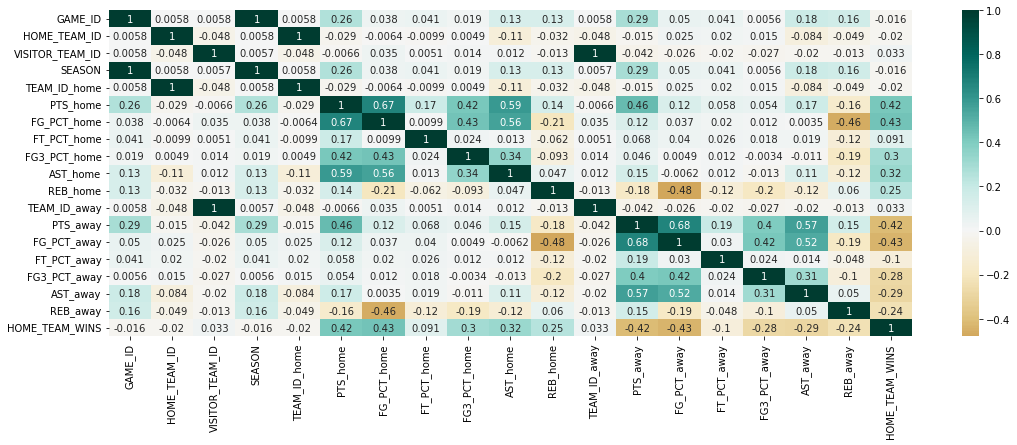

In [4]:
df_corr = df.corr()
plt.figure(figsize=(18,6))
sns.heatmap(df_corr, annot=True, cmap='BrBG', center=0)

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve

In [6]:
target = df[['HOME_TEAM_WINS']]
data = df[['FG_PCT_home', 'FG_PCT_away', 'FG3_PCT_home', 'FG3_PCT_away']]

In [32]:
data.shape

(19398, 4)

In [33]:
target.shape

(19398, 1)

In [34]:
np.ravel(target)

array([0, 1, 1, ..., 1, 1, 1])

In [18]:
def evaluate(estimator, data, target):

    X_train, X_test, y_train, y_test = train_test_split(data,target)

    estimator.fit(X_train, y_train)
    y_hat = estimator.predict(X_test)
    probs = estimator.predict_proba(X_test)[:,1]

    # plotear curva roc
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    f, ax = plt.subplots(1,1)
    f.set_size_inches(8,7)
    ax.plot(fpr,tpr)
    ax.plot([0,1], [0,1], c='grey')

    print(f'acc: {accuracy_score(y_test, y_hat):.3} \
    recall: {recall_score(y_test, y_hat):.3} \
    precision:{precision_score(y_test, y_hat):.3} \
    f1:{f1_score(y_test, y_hat):.3} \
    auc:{roc_auc_score(y_test, probs):.3}')

acc: 0.808     recall: 0.863     precision:0.825     f1:0.844     auc:0.89


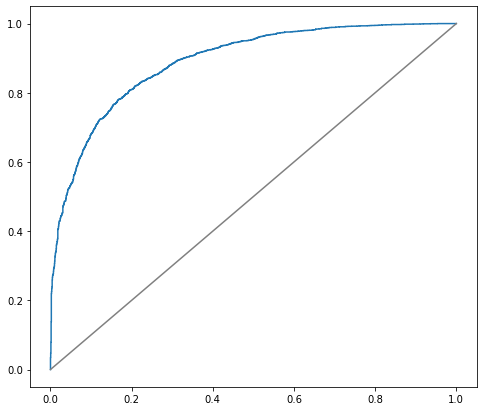

In [21]:
logR = LogisticRegression()
evaluate(logR, data, np.ravel(target))

In [16]:
results = pd.DataFrame(columns=['MSE','RMSE', "MAE"])
results

,MSE,RMSE,MAE


In [23]:
lr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(data,target)

lr.fit(X_train, y_train)
y_hat = lr.predict(X_test)

errors = y_test - y_hat
mae = np.mean(np.abs(errors))
mse = np.mean(errors ** 2)
rmse = np.sqrt(mse)
    
results.loc['lr'] = [mse,rmse,mae]
results

,MSE,RMSE,MAE
lr,HOME_TEAM_WINS 0.139726 dtype: float64,HOME_TEAM_WINS 0.3738 dtype: float64,HOME_TEAM_WINS 0.315708 dtype: float64


In [25]:
kn = KNeighborsRegressor()

X_train, X_test, y_train, y_test = train_test_split(data,target)

kn.fit(X_train, y_train)
y_hat = kn.predict(X_test)

errors = y_test - y_hat
mae = np.mean(np.abs(errors))
mse = np.mean(errors ** 2)
rmse = np.sqrt(mse)
    
results.loc['kn'] = [mse,rmse,mae]
results

,MSE,RMSE,MAE
lr,HOME_TEAM_WINS 0.139726 dtype: float64,HOME_TEAM_WINS 0.3738 dtype: float64,HOME_TEAM_WINS 0.315708 dtype: float64
kn,HOME_TEAM_WINS 0.155019 dtype: float64,HOME_TEAM_WINS 0.393724 dtype: float64,HOME_TEAM_WINS 0.266969 dtype: float64


In [28]:
dc = DecisionTreeRegressor()

X_train, X_test, y_train, y_test = train_test_split(data,target)

dc.fit(X_train, y_train)
y_hat = dc.predict(X_test)

y_hat=y_hat.reshape(4850,1)

errors = y_test - y_hat
mae = np.mean(np.abs(errors))
mse = np.mean(errors ** 2)
rmse = np.sqrt(mse)
    
results.loc['dc'] = [mse,rmse,mae]
results

,MSE,RMSE,MAE
lr,HOME_TEAM_WINS 0.139726 dtype: float64,HOME_TEAM_WINS 0.3738 dtype: float64,HOME_TEAM_WINS 0.315708 dtype: float64
kn,HOME_TEAM_WINS 0.155019 dtype: float64,HOME_TEAM_WINS 0.393724 dtype: float64,HOME_TEAM_WINS 0.266969 dtype: float64
dc,HOME_TEAM_WINS 0.262887 dtype: float64,HOME_TEAM_WINS 0.512725 dtype: float64,HOME_TEAM_WINS 0.262887 dtype: float64


In [30]:
rf = RandomForestRegressor()

X_train, X_test, y_train, y_test = train_test_split(data,target)

rf.fit(X_train, y_train)
y_hat = rf.predict(X_test)

y_hat=y_hat.reshape(4850,1)

errors = y_test - y_hat
mae = np.mean(np.abs(errors))
mse = np.mean(errors ** 2)
rmse = np.sqrt(mse)
    
results.loc['rf'] = [mse,rmse,mae]

/tmp/ipykernel_8554/1877398911.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


In [31]:
mlpr = MLPRegressor()

X_train, X_test, y_train, y_test = train_test_split(data,target)

mlpr.fit(X_train, y_train)
y_hat = mlpr.predict(X_test)

y_hat=y_hat.reshape(4850,1)

errors = y_test - y_hat
mae = np.mean(np.abs(errors))
mse = np.mean(errors ** 2)
rmse = np.sqrt(mse)
    
results.loc['mlpr'] = [mse,rmse,mae]
results

/home/dsc/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,MSE,RMSE,MAE
lr,HOME_TEAM_WINS 0.139726 dtype: float64,HOME_TEAM_WINS 0.3738 dtype: float64,HOME_TEAM_WINS 0.315708 dtype: float64
kn,HOME_TEAM_WINS 0.155019 dtype: float64,HOME_TEAM_WINS 0.393724 dtype: float64,HOME_TEAM_WINS 0.266969 dtype: float64
dc,HOME_TEAM_WINS 0.262887 dtype: float64,HOME_TEAM_WINS 0.512725 dtype: float64,HOME_TEAM_WINS 0.262887 dtype: float64
rf,HOME_TEAM_WINS 0.142604 dtype: float64,HOME_TEAM_WINS 0.377629 dtype: float64,HOME_TEAM_WINS 0.268499 dtype: float64
mlpr,HOME_TEAM_WINS 0.130768 dtype: float64,HOME_TEAM_WINS 0.361619 dtype: float64,HOME_TEAM_WINS 0.280727 dtype: float64


In [ ]:
normalized = data.copy()
normalized = (normalized - normalized.mean()) / normalized.std()
normalized

In [ ]:
scaler = StandardScaler()
standarized = scaler.fit_transform(numeric)

pca = PCA()
pca.fit(standarized)